In [ ]:
%cd /content/drive/My Drive/Internship

/content/drive/My Drive/Internship


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
from keras.callbacks import History 

In [ ]:
def Plot(acc,loss,epochs,epochs_range,name):
  plt.figure(figsize=(8, 8))
  plt.subplot(1, 1, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.legend(loc='lower right')
  plt.title(f'Training Accuracy and training Loss of {name}')

In [ ]:
class Nets:
  def __init__(self,X_train,y_train):
    self.X_train=X_train
    self.y_train=y_train
  def NetA(self):
    Neta = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(units=10, activation='softmax')    
    ])

    Neta.compile(optimizer='SGD',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']) 
    history=Neta.fit(self.X_train, self.y_train, epochs=50)
    Neta.save('./Models/NetA.h5')
    acc = history.history['accuracy']
    loss = history.history['loss']
    epochs =50
    epochs_range = range(epochs)
    Plot(acc,loss,epochs,epochs_range,'NetA')
  def NetB(self):
    Netb = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(units=300, activation='relu'),
        layers.Dense(units=10, activation='softmax')    
    ])

    Netb.compile(optimizer='SGD',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history=Netb.fit(self.X_train, self.y_train, epochs=50)
    Netb.save('./Models/NetB.h5')
    acc = history.history['accuracy']
    loss = history.history['loss']
    epochs =50
    epochs_range = range(epochs)
    Plot(acc,loss,epochs,epochs_range,'NetB')
  
  def NetC(self):
    Netc = models.Sequential([
    layers.Conv2D(25,(5, 5), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    
    layers.Flatten(),
    layers.Dense(25, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])

    Netc.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history=Netc.fit(self.X_train, self.y_train, epochs=50)
    Netc.save('./Models/NetC.h5')
    acc = history.history['accuracy']
    loss = history.history['loss']
    epochs =50
    epochs_range = range(epochs)
    Plot(acc,loss,epochs,epochs_range,'NetC')


Epoch 1/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.9440 - accuracy: 0.3064
Epoch 2/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8442 - accuracy: 0.3512
Epoch 3/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8167 - accuracy: 0.3623
Epoch 4/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7950 - accuracy: 0.3726
Epoch 5/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7826 - accuracy: 0.3785
Epoch 6/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7756 - accuracy: 0.3802
Epoch 7/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7635 - accuracy: 0.3859
Epoch 8/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7581 - accuracy: 0.3893
Epoch 9/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7522 - accuracy: 0.3915
Epoch 10/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.749

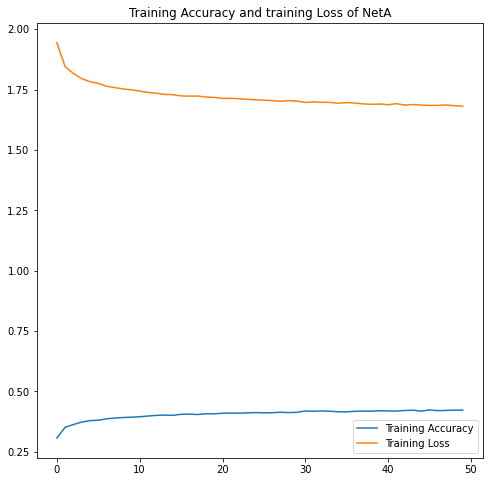

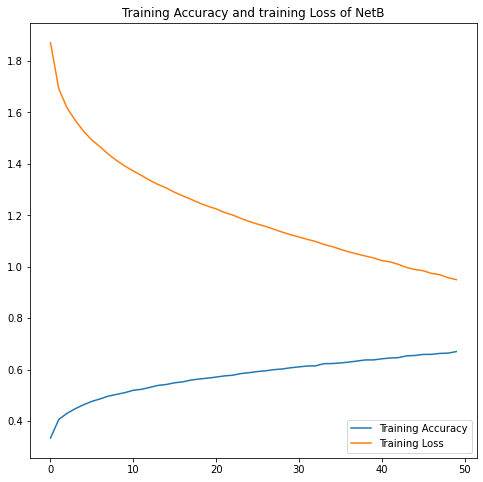

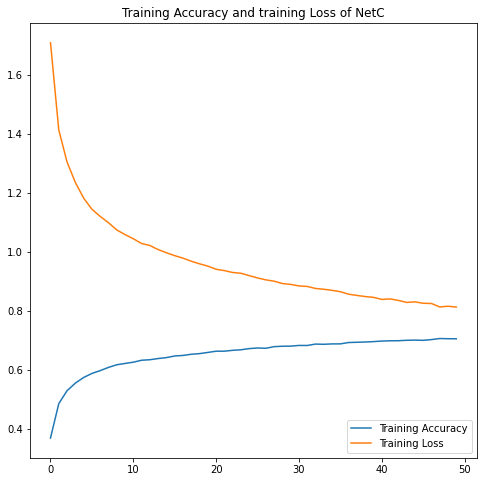

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
X_train = X_train / 255.0
X_test = X_test / 255.0
Rishab=Nets(X_train,y_train)
Rishab.NetA()
Rishab.NetB()
Rishab.NetC()


In [18]:
from tensorflow.keras.models import load_model
class Evaluate:
  def __init__(self,test_images,test_labels):
    self.test_images=test_images
    self.test_labels=test_labels
  def eval(self,model_path,name):
     new_model=load_model(model_path) 
     loss, acc = new_model.evaluate(self.test_images, self.test_labels, verbose=2)
     print('Restored model, accuracy for {}: {:5.2f}%'.format(name,100 * acc))


In [19]:
Evaluates=Evaluate(X_test,y_test)
NetA_path='./Models/NetA.h5'
NetB_path='./Models/NetB.h5'
NetC_path='./Models/NetC.h5'
Evaluates.eval(NetA_path,'NetA')
Evaluates.eval(NetB_path,'NetB')
Evaluates.eval(NetC_path,'NetC')

313/313 - 1s - loss: 1.7437 - accuracy: 0.3940
Restored model, accuracy forNetA: 39.40%
313/313 - 1s - loss: 1.3708 - accuracy: 0.5354
Restored model, accuracy forNetB: 53.54%
313/313 - 1s - loss: 1.2228 - accuracy: 0.5967
Restored model, accuracy forNetC: 59.67%


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
